In [5]:
import numpy as np
import pandas as pd

# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt
# we want our plots inline
%matplotlib inline 
#import seaborn as sns
import seaborn as sns

beta_shrooms = pd.read_fwf('/home/gh23935521/Downloads/mushroom/agaricus-lepiota.data',
                    names=['cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment',
                           'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
                           'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color',
                           'population','habitat'])

shrooms = beta_shrooms['cap-shape'].str.split(',', expand=True)
shrooms

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
names=['poisonous-or-edible','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment',
                           'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
       'stalk-surface-above-ring','stalk-surface-below-ring',
                           'stalk-color-above-ring','stalk-color-below-ring',
       'veil-type','veil-color','ring-number','ring-type','spore-print-color',
                           'population','habitat']
i = 0

for col in shrooms:
    shrooms.rename(columns={col:names[i]}, inplace=True)
    i+=1
    
shrooms

,poisonous-or-edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [7]:
shrooms.drop(columns=shrooms.columns[[2,3,4]], inplace=True)
shrooms.drop(columns=shrooms.columns[3:21], inplace=True)

shrooms

,poisonous-or-edible,cap-shape,odor
0,p,x,p
1,e,x,a
2,e,b,l
3,p,x,p
4,e,x,n
...,...,...,...
8119,e,k,n
8120,e,x,n
8121,e,f,n
8122,p,k,y


In [8]:
shrooms.loc[shrooms["poisonous-or-edible"] == 'e', 'poisonous-or-edible'] = 0
shrooms.loc[shrooms["poisonous-or-edible"] == 'p', 'poisonous-or-edible'] = 1

shrooms.loc[shrooms["cap-shape"] == 'b', 'cap-shape'] = 2
shrooms.loc[shrooms["cap-shape"] == 'c', 'cap-shape'] = 3
shrooms.loc[shrooms["cap-shape"] == 'x', 'cap-shape'] = 4
shrooms.loc[shrooms["cap-shape"] == 'f', 'cap-shape'] = 5
shrooms.loc[shrooms["cap-shape"] == 'k', 'cap-shape'] = 6
shrooms.loc[shrooms["cap-shape"] == 's', 'cap-shape'] = 7

shrooms.loc[shrooms["odor"] == 'a', 'odor'] = 9
shrooms.loc[shrooms["odor"] == 'l', 'odor'] = 8
shrooms.loc[shrooms["odor"] == 'c', 'odor'] = 7
shrooms.loc[shrooms["odor"] == 'y', 'odor'] = 6
shrooms.loc[shrooms["odor"] == 'f', 'odor'] = 5
shrooms.loc[shrooms["odor"] == 'm', 'odor'] = 4
shrooms.loc[shrooms["odor"] == 'n', 'odor'] = 3
shrooms.loc[shrooms["odor"] == 'p', 'odor'] = 2
shrooms.loc[shrooms["odor"] == 's', 'odor'] = 1

shrooms

,poisonous-or-edible,cap-shape,odor
0,1,4,2
1,0,4,9
2,0,2,8
3,1,4,2
4,0,4,3
...,...,...,...
8119,0,6,3
8120,0,4,3
8121,0,5,3
8122,1,6,6


<AxesSubplot:xlabel='odor', ylabel='poisonous-or-edible'>

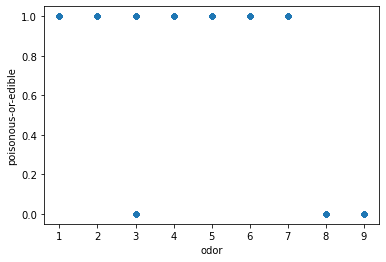

In [10]:
shrooms.plot(kind='scatter', x='odor', y='poisonous-or-edible')

<AxesSubplot:xlabel='cap-shape', ylabel='poisonous-or-edible'>

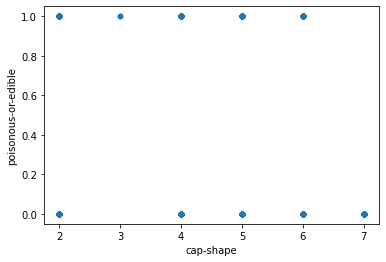

In [12]:
shrooms.plot(kind='scatter', x='cap-shape', y='poisonous-or-edible')